In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data

data=pd.read_csv(r"C:\Users\Prerana\Downloads\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data.rename(columns={'Delivery Time':'DeliveryTime',
                    'Sorting Time':'SortingTime'},inplace=True)
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

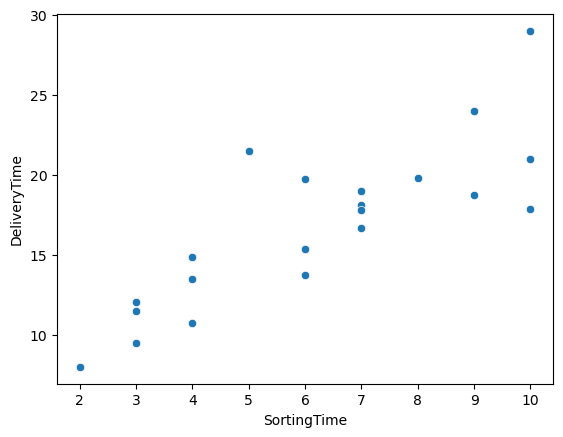

In [7]:
sns.scatterplot(x=data['SortingTime'],y=data['DeliveryTime'])

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

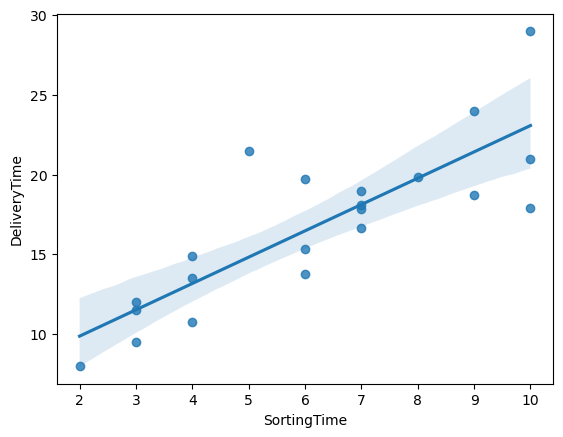

In [8]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=data)

In [9]:
#Correlation Analysis
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:>

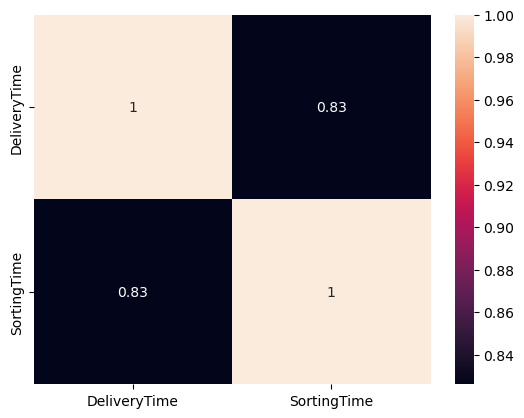

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
#Model Creation
model=smf.ols('DeliveryTime~SortingTime',data=data).fit()

In [12]:
#Model Parameteres
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [13]:
#Checking p value
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [14]:
#r2 value
model.rsquared

0.6822714748417231

In [15]:
#Transform the data
from sklearn.preprocessing import StandardScaler

In [16]:
Scaler = StandardScaler()
data_scaled = pd.DataFrame(Scaler.fit_transform(data),columns=data.columns)

In [17]:
data_scaled

,DeliveryTime,SortingTime
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [18]:
model1=smf.ols('DeliveryTime~SortingTime',data=data_scaled).fit()

In [19]:
#Model Parameteres
model1.params

Intercept     -5.067181e-16
SortingTime    8.259973e-01
dtype: float64

In [20]:
#Checking p value
model1.pvalues

Intercept      1.000000
SortingTime    0.000004
dtype: float64

In [21]:
#r2 value
model1.rsquared

0.682271474841723

Log Transformation of Sorting time

In [23]:
data['log_SortingTime']=np.log(data['SortingTime'])

In [24]:
model2=smf.ols('DeliveryTime~log_SortingTime',data=data).fit()

In [25]:
#Model Parameteres
model2.params

Intercept          1.159684
log_SortingTime    9.043413
dtype: float64

In [26]:
#Checking p value
model2.pvalues

Intercept          0.641980
log_SortingTime    0.000003
dtype: float64

In [27]:
#r2 value
model2.rsquared

0.6954434611324223

Log Transformation of Delivery Time

In [29]:
data['log_DeliveryTime']=np.log(data['DeliveryTime'])

In [30]:
model3=smf.ols('log_DeliveryTime~SortingTime',data=data).fit()

In [31]:
#Model Parameteres
model3.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [32]:
#Checking p value
model3.pvalues

Intercept      1.857343e-14
SortingTime    1.592708e-06
dtype: float64

In [33]:
#r2 value
model3.rsquared

0.7109478980584187

Log Transformation of Delivery Time and Sorting Time

In [34]:
model4=smf.ols('log_DeliveryTime~log_SortingTime',data=data).fit()

In [35]:
#Model Parameteres
model4.params

Intercept          1.741987
log_SortingTime    0.597522
dtype: float64

In [36]:
#Checking p value
model4.pvalues

Intercept          5.921137e-11
log_SortingTime    1.601539e-07
dtype: float64

In [37]:
#r2 value
model4.rsquared

0.77216134926874

Sqrt Transformation of Sorting Time

In [39]:
data['sqrt_SortingTime']=np.sqrt(data['SortingTime'])

In [40]:
model5=smf.ols('DeliveryTime~sqrt_SortingTime',data=data).fit()

In [41]:
#Model Parameteres
model5.params

Intercept          -2.518837
sqrt_SortingTime    7.936591
dtype: float64

In [42]:
#Checking p value
model5.pvalues

Intercept           0.410857
sqrt_SortingTime    0.000003
dtype: float64

In [43]:
#r2 value
model5.rsquared

0.695806227630867

Sqrt Transformation of Delivery Time

In [44]:
data['sqrt_DeliveryTime']=np.sqrt(data['DeliveryTime'])

In [46]:
model6=smf.ols('sqrt_DeliveryTime~SortingTime',data=data).fit()

In [47]:
#Model Parameteres
model6.params

Intercept      2.772731
SortingTime    0.206632
dtype: float64

In [48]:
#Checking p value
model6.pvalues

Intercept      3.339366e-11
SortingTime    2.001215e-06
dtype: float64

In [49]:
#r2 value
model6.rsquared

0.704049871541756

Sqrt Transformation of both.

In [50]:
model7=smf.ols('sqrt_DeliveryTime~sqrt_SortingTime',data=data).fit()

In [51]:
#Model Parameteres
model7.params

Intercept           1.613479
sqrt_SortingTime    1.002217
dtype: float64

In [52]:
#Checking p value
model7.pvalues

Intercept           1.833621e-04
sqrt_SortingTime    8.475706e-07
dtype: float64

In [57]:
#r2 value
model7.rsquared

0.7292011987544665

Model 4 gives the best accuracy.